Hunter Bennett | Glass Lab | Kupffer Strains Project | 05 April 2023

Notebook for motif analysis of H3K27Ac ChIP-seq cis trans peak sets


### Import packages, set plotting parameters

In [11]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Set working directory  
Set data directory containing homer tag directories for each ATAC-seq sample

In [9]:
workingDirectory = '/home/h1bennet/strains_github/results/Figure5_H3K27Ac/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

Create folder for motif analysis

In [10]:
if not os.path.isdir('./motif_calling/'):
    os.mkdir('./motif_calling/')

Create scripts for running motif analysis

In [4]:
strain_dict = {'c57': 'c57bl6j',
               'balb': 'balbcj',
               'aj': 'aj'}

# background set all peaks that were considered as differential
all_peaks = './peakQuan/allPeaksF1F0.txt' 
all_peaks_distal = './peakQuan/allPeaksF1F0_distal.txt' 

with open('./findMotifs_differential_trans.sh', 'w') as f:
    for peakfile in np.sort(glob.glob('./motif_calling/h3k27ac*trans*.txt')):
        strain = peakfile.split('/')[-1].split('_')[2]
        if 'distal' in peakfile:
            call = ['/home/vlink/code/marge/bin/MMARGE.pl', 'denovo_motifs',
                    peakfile, 'mm10', peakfile.replace('.txt', '_motifs'),
                    '-len 8,10,12,14,16', '-fg_strain', strain_dict[strain],
                    '-bg_strain', strain_dict[strain], '-p 16\n\n']
        else:
            call = ['/home/vlink/code/marge/bin/MMARGE.pl', 'denovo_motifs',
                    peakfile, 'mm10', peakfile.replace('.txt', '_motifs'),
                    '-len 8,10,12,14,16', '-fg_strain', strain_dict[strain],
                    '-bg_strain', strain_dict[strain], '-p 16\n\n']
        f.write(' '.join(call))
        
with open('./findMotifs_differential_cis.sh', 'w') as f:
    for peakfile in np.sort(glob.glob('./motif_calling/h3k27ac*cis*.txt')):
        strain = peakfile.split('/')[-1].split('_')[2]
        if 'distal' in peakfile:
            call = ['/home/vlink/code/marge/bin/MMARGE.pl', 'denovo_motifs',
                    peakfile, 'mm10', peakfile.replace('.txt', '_motifs'),
                    '-len 8,10,12,14,16', '-fg_strain', strain_dict[strain],
                    '-bg_strain', strain_dict[strain], '-p 16\n\n']
        else:
            call = ['/home/vlink/code/marge/bin/MMARGE.pl', 'denovo_motifs',
                    peakfile, 'mm10', peakfile.replace('.txt', '_motifs'),
                    '-len 8,10,12,14,16', '-fg_strain', strain_dict[strain],
                    '-bg_strain', strain_dict[strain], '-p 16\n\n']
        f.write(' '.join(call))

Run scripts in terminal

    bash ./findMotifs_differential_trans.sh
    bash ./findMotifs_differential_cis.sh

In [5]:
known_motif_pval_dict = {}
for f in np.sort(glob.glob('./motif_calling_github/*/knownResults.txt')):
    # read in signifance values using pandas
    frame = pd.read_csv(f, sep='\t', index_col=0)
    
    # remove duplicates
    frame = frame[~frame.index.duplicated(keep='first')]
    pval = frame.iloc[:, 2] #log10 pvalue
    
    # extract name of sample
    sample = f.split('/')[-2]
    
    # store in dict
    known_motif_pval_dict[sample] = pval    
    
# create data frame
known_motif_pval_frame = pd.DataFrame(known_motif_pval_dict)

# sort by average p value
known_motif_pval_frame = known_motif_pval_frame.reindex(known_motif_pval_frame.mean(axis=1).sort_values().index.tolist())

known_motif_pval_frame.to_csv('./homer_known_motifs_all.txt', sep='\t')

# Create scatterplots of knownMotif enrichment

KeyError: 'h3k27ac_trans_c57_hunterFCThenPadj_motifs'

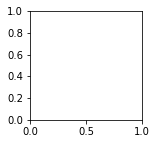

In [12]:
fig, ax = plt.subplots(figsize=(2,2))
xaxis = 'h3k27ac_trans_c57_hunterFCThenPadj_motifs'
yaxis = 'h3k27ac_trans_balb_hunterFCThenPadj_motifs'

ax.scatter(-known_motif_pval_frame.loc[:, xaxis],
           -known_motif_pval_frame.loc[:, yaxis],
           s=1,
           c='k',
           zorder=1)
ax.plot([0,200],[0,200],c='gray',linewidth=1, zorder=0)
ax.set_xlim([0,200])
ax.set_ylim([0,200])

ax.set_xlabel('C57BL/6J log10(q-value)')
ax.set_ylabel('BALB/cJ log10(q-value)')


for lab, row in filt_frame.sort_values('pval_diff', ascending=True).iloc[:10, :].iterrows():
    ax.text(-row[0], -row[1], lab.split('(')[0])
    
for lab, row in filt_frame.sort_values('pval_diff', ascending=False).iloc[:10, :].iterrows():
    ax.text(-row[0], -row[1], lab.split('(')[0])


"Zoomed in" scatterplot

In [7]:
fig, ax = plt.subplots(figsize=(2,2))
xaxis = 'atac_trans_c57_hunterFCThenPadj_motifs
yaxis = 'atac_trans_balb_hunterFCThenPadj_motifs'

ax.scatter(-known_motif_pval_frame.loc[:, xaxis],
           -known_motif_pval_frame.loc[:, yaxis],
           s=1,
           c='k',
           zorder=1)
ax.plot([0,100],[0,100],c='gray',linewidth=1, zorder=0)
ax.set_xlim([0,20])
ax.set_ylim([0,20])

ax.set_xlabel('C57BL/6J log10(q-value)')
ax.set_ylabel('BALB/cJ log10(q-value)')


for lab, row in filt_frame.sort_values('pval_diff', ascending=True).iloc[:20, :].iterrows():
    ax.text(-row[0], -row[1], lab.split('(')[0])
    
for lab, row in filt_frame.sort_values('pval_diff', ascending=False).iloc[:20, :].iterrows():
    ax.text(-row[0], -row[1], lab.split('(')[0])
        

SyntaxError: EOL while scanning string literal (<ipython-input-7-e0e61865a43e>, line 2)